In [8]:
#1. initial value problem y' = Ay; y(t_0) = y_0

In [249]:
#Import statements
import scipy.linalg
from scipy.linalg import expm, norm, eigvals, solve
import numpy as np
import matplotlib.pyplot as plt

In [412]:
import scipy
import scipy.linalg
from scipy.linalg import expm, norm, eigvals, solve
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [353]:
A = np.array([[3]])
y0 = 1 
t0 = 0
tf = 1
N = 50
t = [t0 + k*(tf-t0)/N for k in range(N)]

In [314]:
def eulerstep(A, uold, h):
    return uold + h*A.dot(uold)

In [315]:
eulerstep(A,y0,(tf-t0)/N)

array([1.04])

In [328]:
A.shape

(1, 1)

In [397]:
def eulerint(A, y0, t0, tf, N):
    h = (tf-t0)/N
    t = [t0 + k*h for k in range(N)]
    ys = [y0]
    ys_exact = [y0]
    errs = [0]
    for i in range(1,N):
        ys.append(eulerstep(A, ys[i-1], h))
        ys_exact.append(expm(t[i]*A).dot(y0))
        error = norm(ys_exact[i]-ys[i])
        errs.append(error)
    return errs, ys, ys_exact, t

def errVSh(A, y0, t0, tf):
    Ns = [2**k for k in range(12)]
    errors = np.zeros(len(Ns))
    for i in range(len(Ns)):
        errors[i] = eulerint(A,y0,t0,tf,Ns[i])[0][-1]
    plt.semilogy(Ns, errors)
        
    return errors

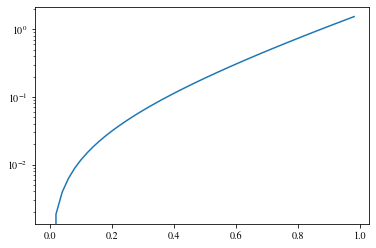

In [395]:

err, ys, ys_exact, t = eulerint(A,y0, t0, tf, N)
plt.semilogy(t,err)

array([0.        , 1.98168907, 4.12836084, 4.51236695, 3.48396624,
       2.20164565, 1.2442593 , 0.66243563, 0.34191891, 0.17371763,
       0.08755904, 0.04395593])

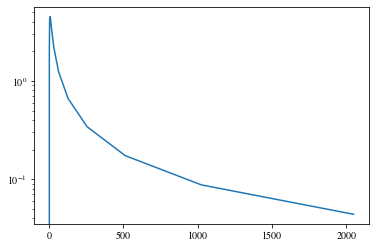

In [398]:
errVSh(A,y0,t0,tf)


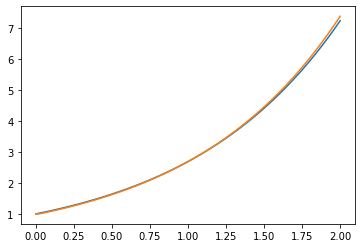

In [110]:
plt.plot(t,ys)
plt.plot(t,ys_exact)

In [418]:
A = np.array([[-1,0],[10,-3]])
y0 = np.transpose(np.array([[1,1]]) )
t0 = 0
tf = 10
N = 50
t = [t0 + k*(tf-t0)/N for k in range(N)]
        

In [409]:
y0.shape

(2, 1)

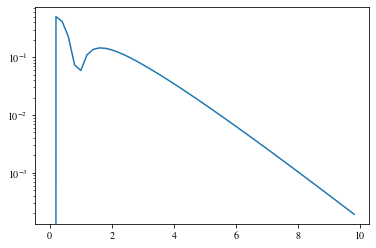

In [411]:

err, ys, ys_exact, t = eulerint(A,y0, t0, tf, N)
plt.semilogy(t,err)

In [419]:
#implicit euler

def ieulerstep(A, uold, h):
    return solve(np.identity(A.shape[0]) - h*A, uold)
    
def ieulerint(A, y0, t0, tf, N):
    h = (tf-t0)/N
    t = [t0 + k*h for k in range(N)]
    ys = [y0]
    ys_exact = [y0]
    errs = [0]
    for i in range(1,N):
        ys.append(ieulerstep(A, ys[i-1], h))
        ys_exact.append(expm(t[i]*A).dot(y0))
        error = norm(ys_exact[i]-ys[i])
        errs.append(error)
    return errs, ys, ys_exact, t

def errVSh(A, y0, t0, tf):
    Ns = [2**k for k in range(12)]
    errors = np.zeros(len(Ns))
    for i in range(len(Ns)):
        errors[i] = ieulerint(A,y0,t0,tf,Ns[i])[0][-1]
    plt.semilogy(Ns, errors)
        
    return errors

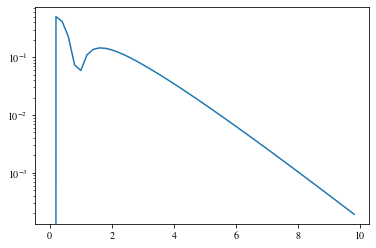

In [421]:
err, ys, ys_exact, t = eulerint(A,y0, t0, tf, N)
plt.semilogy(t,err)